# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn import metrics

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

# 1.EDA

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
dups = df.duplicated()
print("no of duplicated rowsa are - %d" % dups.sum())

no of duplicated rowsa are - 0


# 2.Investigating zeroes:

In [9]:
print(df['carat'].value_counts())

0.30    1331
0.31    1118
1.01    1111
0.70     959
0.32     950
        ... 
2.65       1
1.89       1
4.50       1
1.88       1
3.51       1
Name: carat, Length: 257, dtype: int64


In [10]:
print(df['cut'].value_counts())

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


In [11]:
print(df['color'].value_counts())

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


In [12]:
print(df['clarity'].value_counts())

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


In [13]:
print(df['depth'].value_counts())

62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
        ... 
69.2       1
55.0       1
54.6       1
54.2       1
68.6       1
Name: depth, Length: 169, dtype: int64


In [14]:
print(df['table'].value_counts())

56.0    4988
57.0    4781
58.0    4258
59.0    3302
55.0    3136
        ... 
76.0       1
64.2       1
61.6       1
50.1       1
58.7       1
Name: table, Length: 112, dtype: int64


In [15]:
print(df['x'].value_counts())

4.38    233
4.37    229
4.32    228
4.33    225
4.34    224
       ... 
3.77      1
8.77      1
9.65      1
8.69      1
9.30      1
Name: x, Length: 531, dtype: int64


In [16]:
print(df['y'].value_counts())

4.35     237
4.38     234
4.37     223
4.34     223
4.31     212
        ... 
9.13       1
3.88       1
8.97       1
9.14       1
10.16      1
Name: y, Length: 526, dtype: int64


In [17]:
print(df['z'].value_counts())

2.69     395
2.70     394
2.68     373
2.71     368
2.72     352
        ... 
5.57       1
5.52       1
8.06       1
5.77       1
31.80      1
Name: z, Length: 356, dtype: int64


# 3. Encoding Data

In [18]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null int8
color         26967 non-null int8
clarity       26967 non-null int8
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), int8(3)
memory usage: 1.7 MB


In [20]:
mean = df['depth'].mean()
df['depth'] = df['depth'].fillna(mean)

In [21]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [22]:
for feature in df.columns: 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].nunique()))



feature: Unnamed: 0
[1, 2, 3, 4, 5, ..., 26963, 26964, 26965, 26966, 26967]
Length: 26967
Categories (26967, int64): [1, 2, 3, 4, ..., 26964, 26965, 26966, 26967]
[26967]
Categories (1, int64): [26967]


feature: carat
[0.30, 0.33, 0.90, 0.42, 0.31, ..., 2.58, 2.60, 2.59, 2.41, 3.24]
Length: 257
Categories (257, float64): [0.20, 0.21, 0.22, 0.23, ..., 3.51, 4.00, 4.01, 4.50]
[257]
Categories (1, int64): [257]


feature: cut
[2, 3, 4, 1, 0]
Categories (5, int64): [0, 1, 2, 3, 4]
[5]
Categories (1, int64): [5]


feature: color
[1, 3, 2, 0, 4, 6, 5]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
[7]
Categories (1, int64): [7]


feature: clarity
[2, 1, 7, 4, 6, 5, 3, 0]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
[8]
Categories (1, int64): [8]


feature: depth
[62.1, 60.8, 62.2, 61.6, 60.4, ..., 70.5, 69.6, 72.9, 72.2, 70.8]
Length: 170
Categories (170, float64): [50.8, 52.2, 52.7, 53.1, ..., 71.6, 72.2, 72.9, 73.6]
[170]
Categories (1, int64): [170]


feature: table
[58.0, 60.0, 56.0,

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
cut,26967.0,2.554604,1.024243,0.0,2.00,2.00,3.00,4.00
color,26967.0,2.606111,1.705992,0.0,1.00,3.00,4.00,6.00
clarity,26967.0,3.833537,1.724904,0.0,2.00,4.00,5.00,7.00
depth,26967.0,61.745147,1.394481,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80


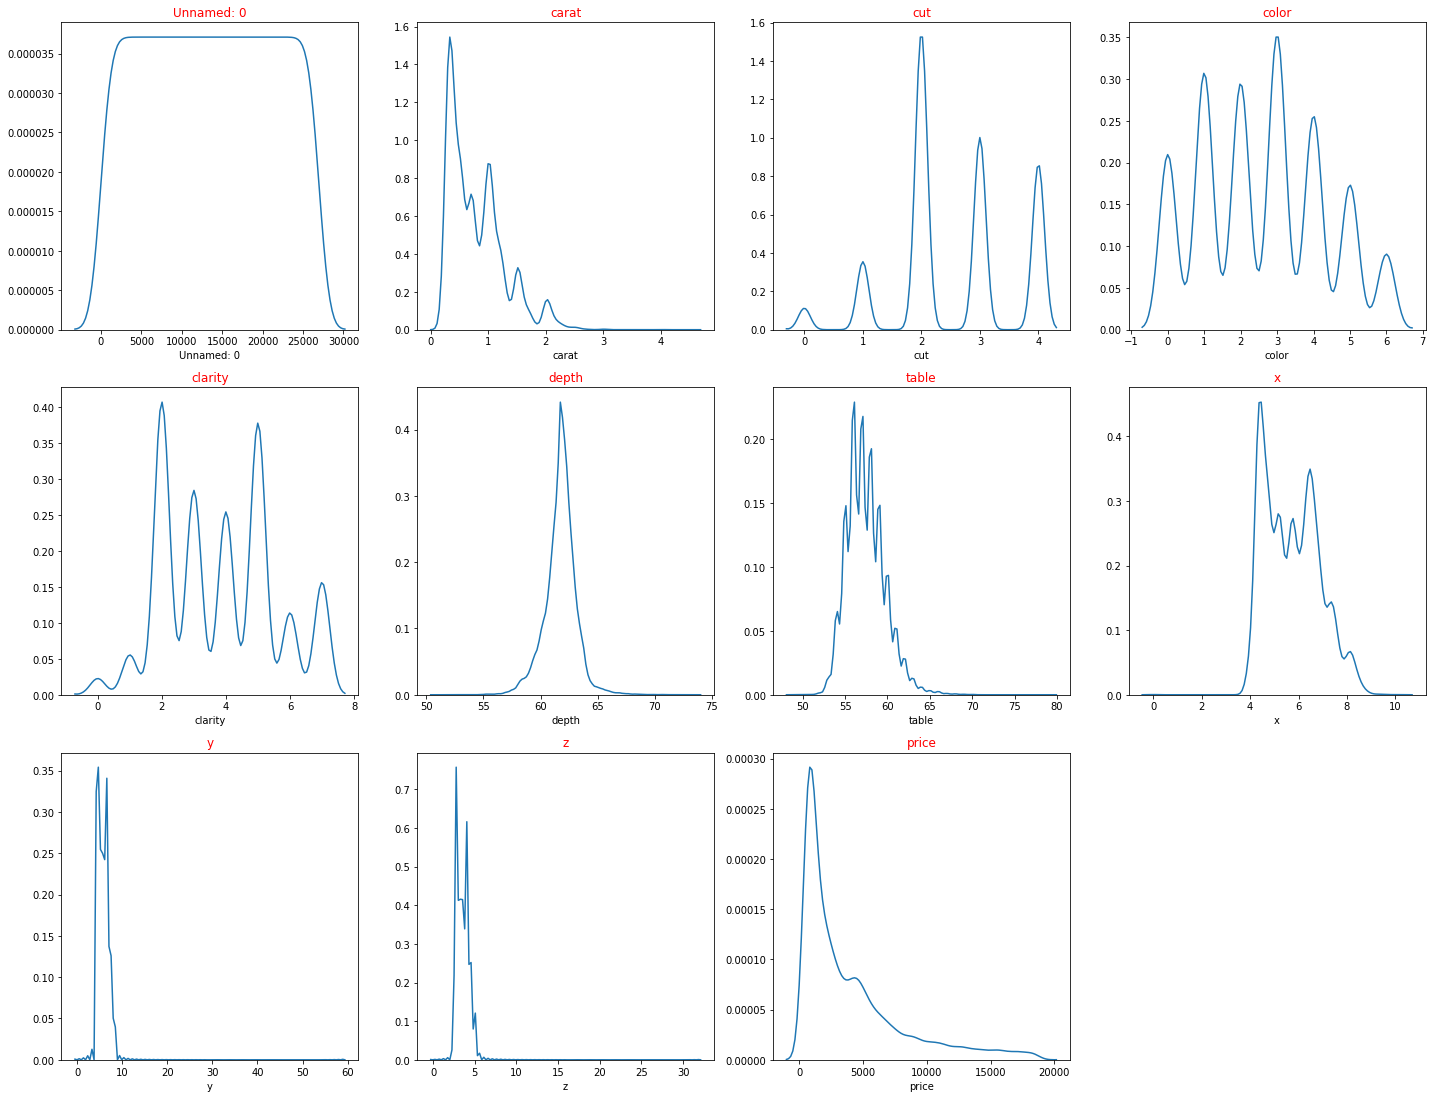

In [24]:
dist_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],hist=False)
    ax.set_title(dist_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q1_displots for all the variables')
plt.show()

# 4. Outliers

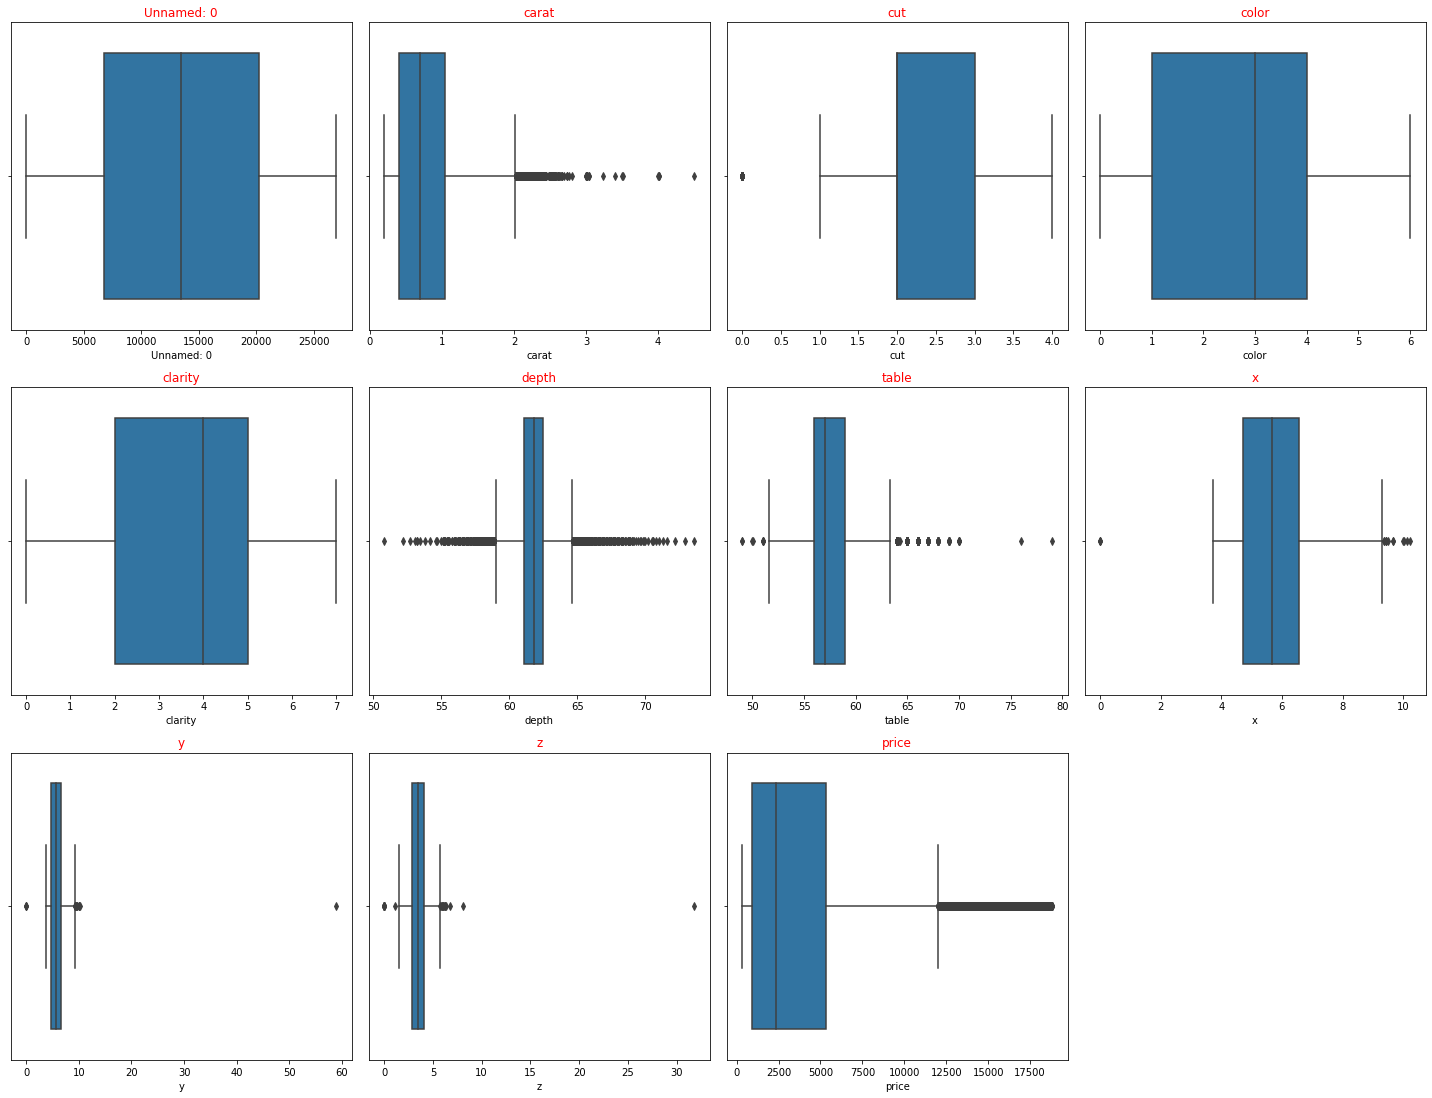

In [25]:
box_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(box_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(box_plot[box_plot.columns[i]])
    ax.set_title(box_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q1_boxplot of all the variables')
plt.show()

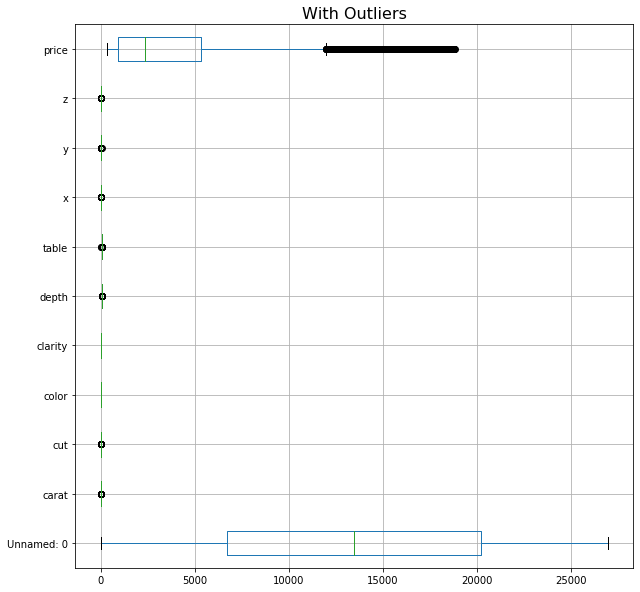

In [26]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.savefig('Boxplot with outliers.png')
plt.show()

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

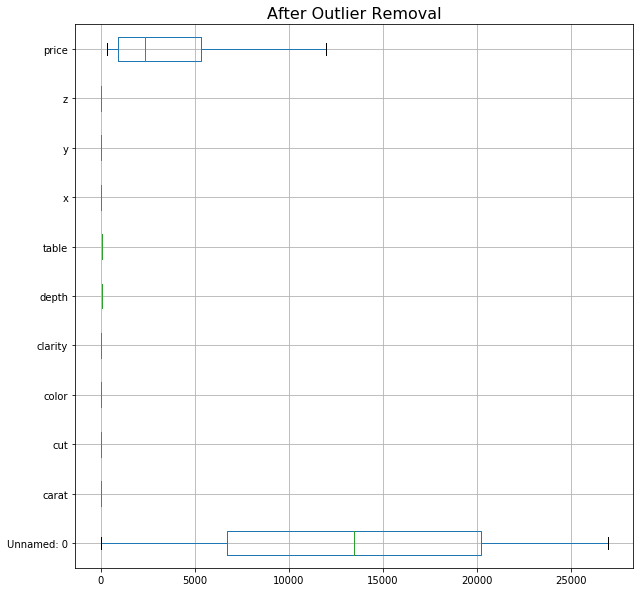

In [29]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.savefig('q1_Boxplot without outliers.png')
plt.show()

# 5.Correlations, Pair-plots and Heatmap

In [30]:
df.skew()

Unnamed: 0    0.000000
carat         0.917096
cut          -0.004668
color         0.188719
clarity       0.178479
depth        -0.191717
table         0.480441
x             0.394470
y             0.390750
z             0.384198
price         1.158126
dtype: float64

In [31]:
df.cov()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
Unnamed: 0,6.060384e+07,13.370514,54.786787,25.806015,10.818030,-46.625703,83.722358,39.990409,38.819716,21.080469,2.478787e+04
carat,1.337051e+01,0.213842,0.014040,0.230165,-0.168243,0.016625,0.186931,0.511897,0.507762,0.315133,1.503512e+03
cut,5.478679e+01,0.014040,0.982118,0.003998,0.020234,-0.208513,0.394090,0.036510,0.041696,0.010188,1.507805e+02
color,2.580601e+01,0.230165,0.003998,2.910410,-0.068759,0.107064,0.089134,0.527175,0.522720,0.330052,1.052346e+03
clarity,1.081803e+01,-0.168243,0.020234,-0.068759,2.975293,-0.104681,-0.301541,-0.436426,-0.427501,-0.272603,-4.362911e+02
depth,-4.662570e+01,0.016625,-0.208513,0.107064,-0.104681,1.485724,-0.761381,-0.027426,-0.031358,0.080855,-3.407773e+00
table,8.372236e+01,0.186931,0.394090,0.089134,-0.301541,-0.761381,4.653190,0.484149,0.467134,0.239793,1.033012e+03
x,3.999041e+01,0.511897,0.036510,0.527175,-0.436426,-0.027426,0.484149,1.270180,1.259206,0.776558,3.570502e+03
y,3.881972e+01,0.507762,0.041696,0.522720,-0.427501,-0.031358,0.467134,1.259206,1.252094,0.770756,3.550554e+03
z,2.108047e+01,0.315133,0.010188,0.330052,-0.272603,0.080855,0.239793,0.776558,0.770756,0.486197,2.192043e+03


In [32]:
df.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003714,0.007101,0.001943,0.000806,-0.004914,0.004986,0.004558,0.004456,0.003884,0.000917
carat,0.003714,1.000000,0.030637,0.291753,-0.210924,0.029494,0.187395,0.982207,0.981285,0.977328,0.936741
cut,0.007101,0.030637,1.000000,0.002365,0.011837,-0.172617,0.184348,0.032689,0.037601,0.014743,0.043835
color,0.001943,0.291753,0.002365,1.000000,-0.023366,0.051487,0.024221,0.274186,0.273826,0.277459,0.177722
clarity,0.000806,-0.210924,0.011837,-0.023366,1.000000,-0.049789,-0.081041,-0.224498,-0.221490,-0.226652,-0.072874
depth,-0.004914,0.029494,-0.172617,0.051487,-0.049789,1.000000,-0.289573,-0.019964,-0.022991,0.095134,-0.000805
table,0.004986,0.187395,0.184348,0.024221,-0.081041,-0.289573,1.000000,0.199146,0.193530,0.159425,0.137971
x,0.004558,0.982207,0.032689,0.274186,-0.224498,-0.019964,0.199146,1.000000,0.998495,0.988179,0.912759
y,0.004456,0.981285,0.037601,0.273826,-0.221490,-0.022991,0.193530,0.998495,1.000000,0.987853,0.914191
z,0.003884,0.977328,0.014743,0.277459,-0.226652,0.095134,0.159425,0.988179,0.987853,1.000000,0.905737


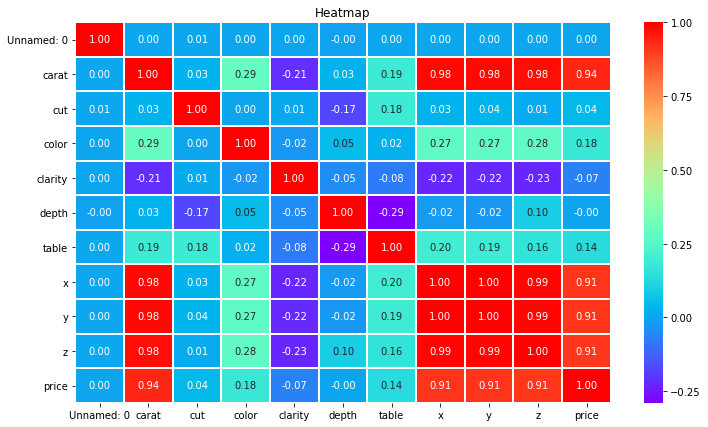

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='rainbow',  linewidths=1)
plt.title('Heatmap')
plt.savefig('q1_heatmap.png')

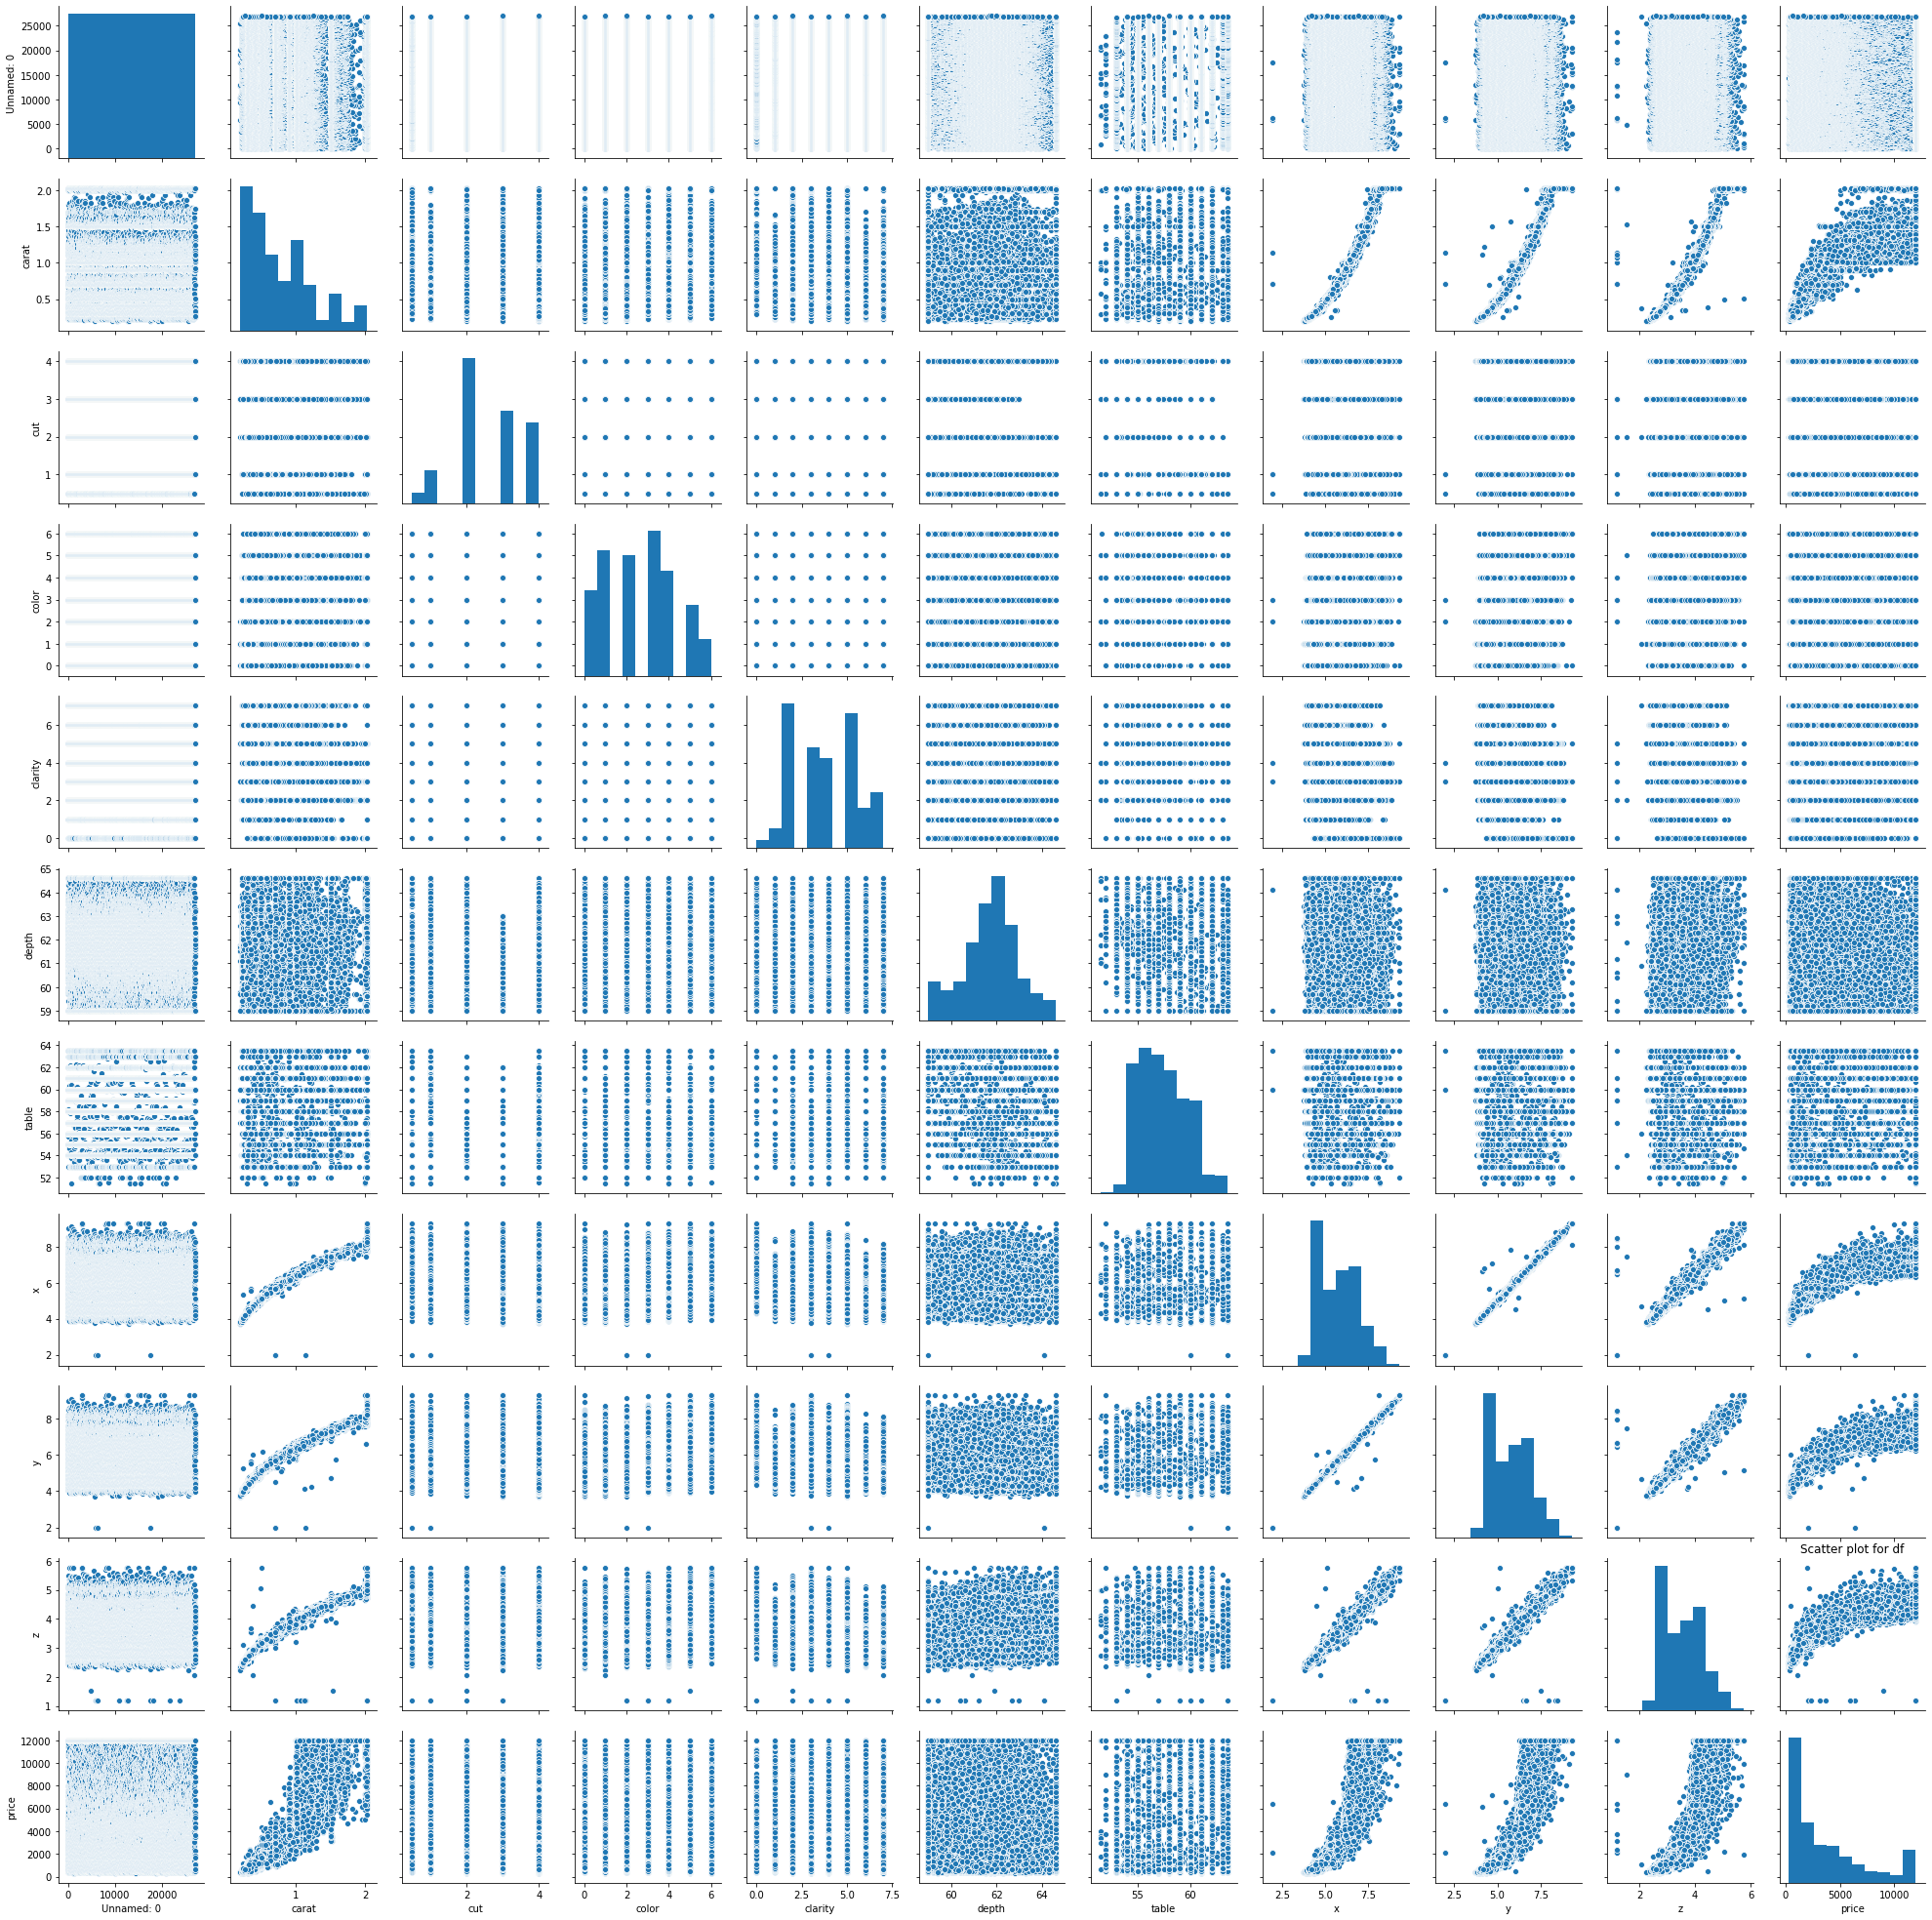

In [34]:
sns.pairplot(df, kind = 'scatter')
plt.title('Scatter plot for df')
plt.savefig('q1_(scatter type)pair plot.png')

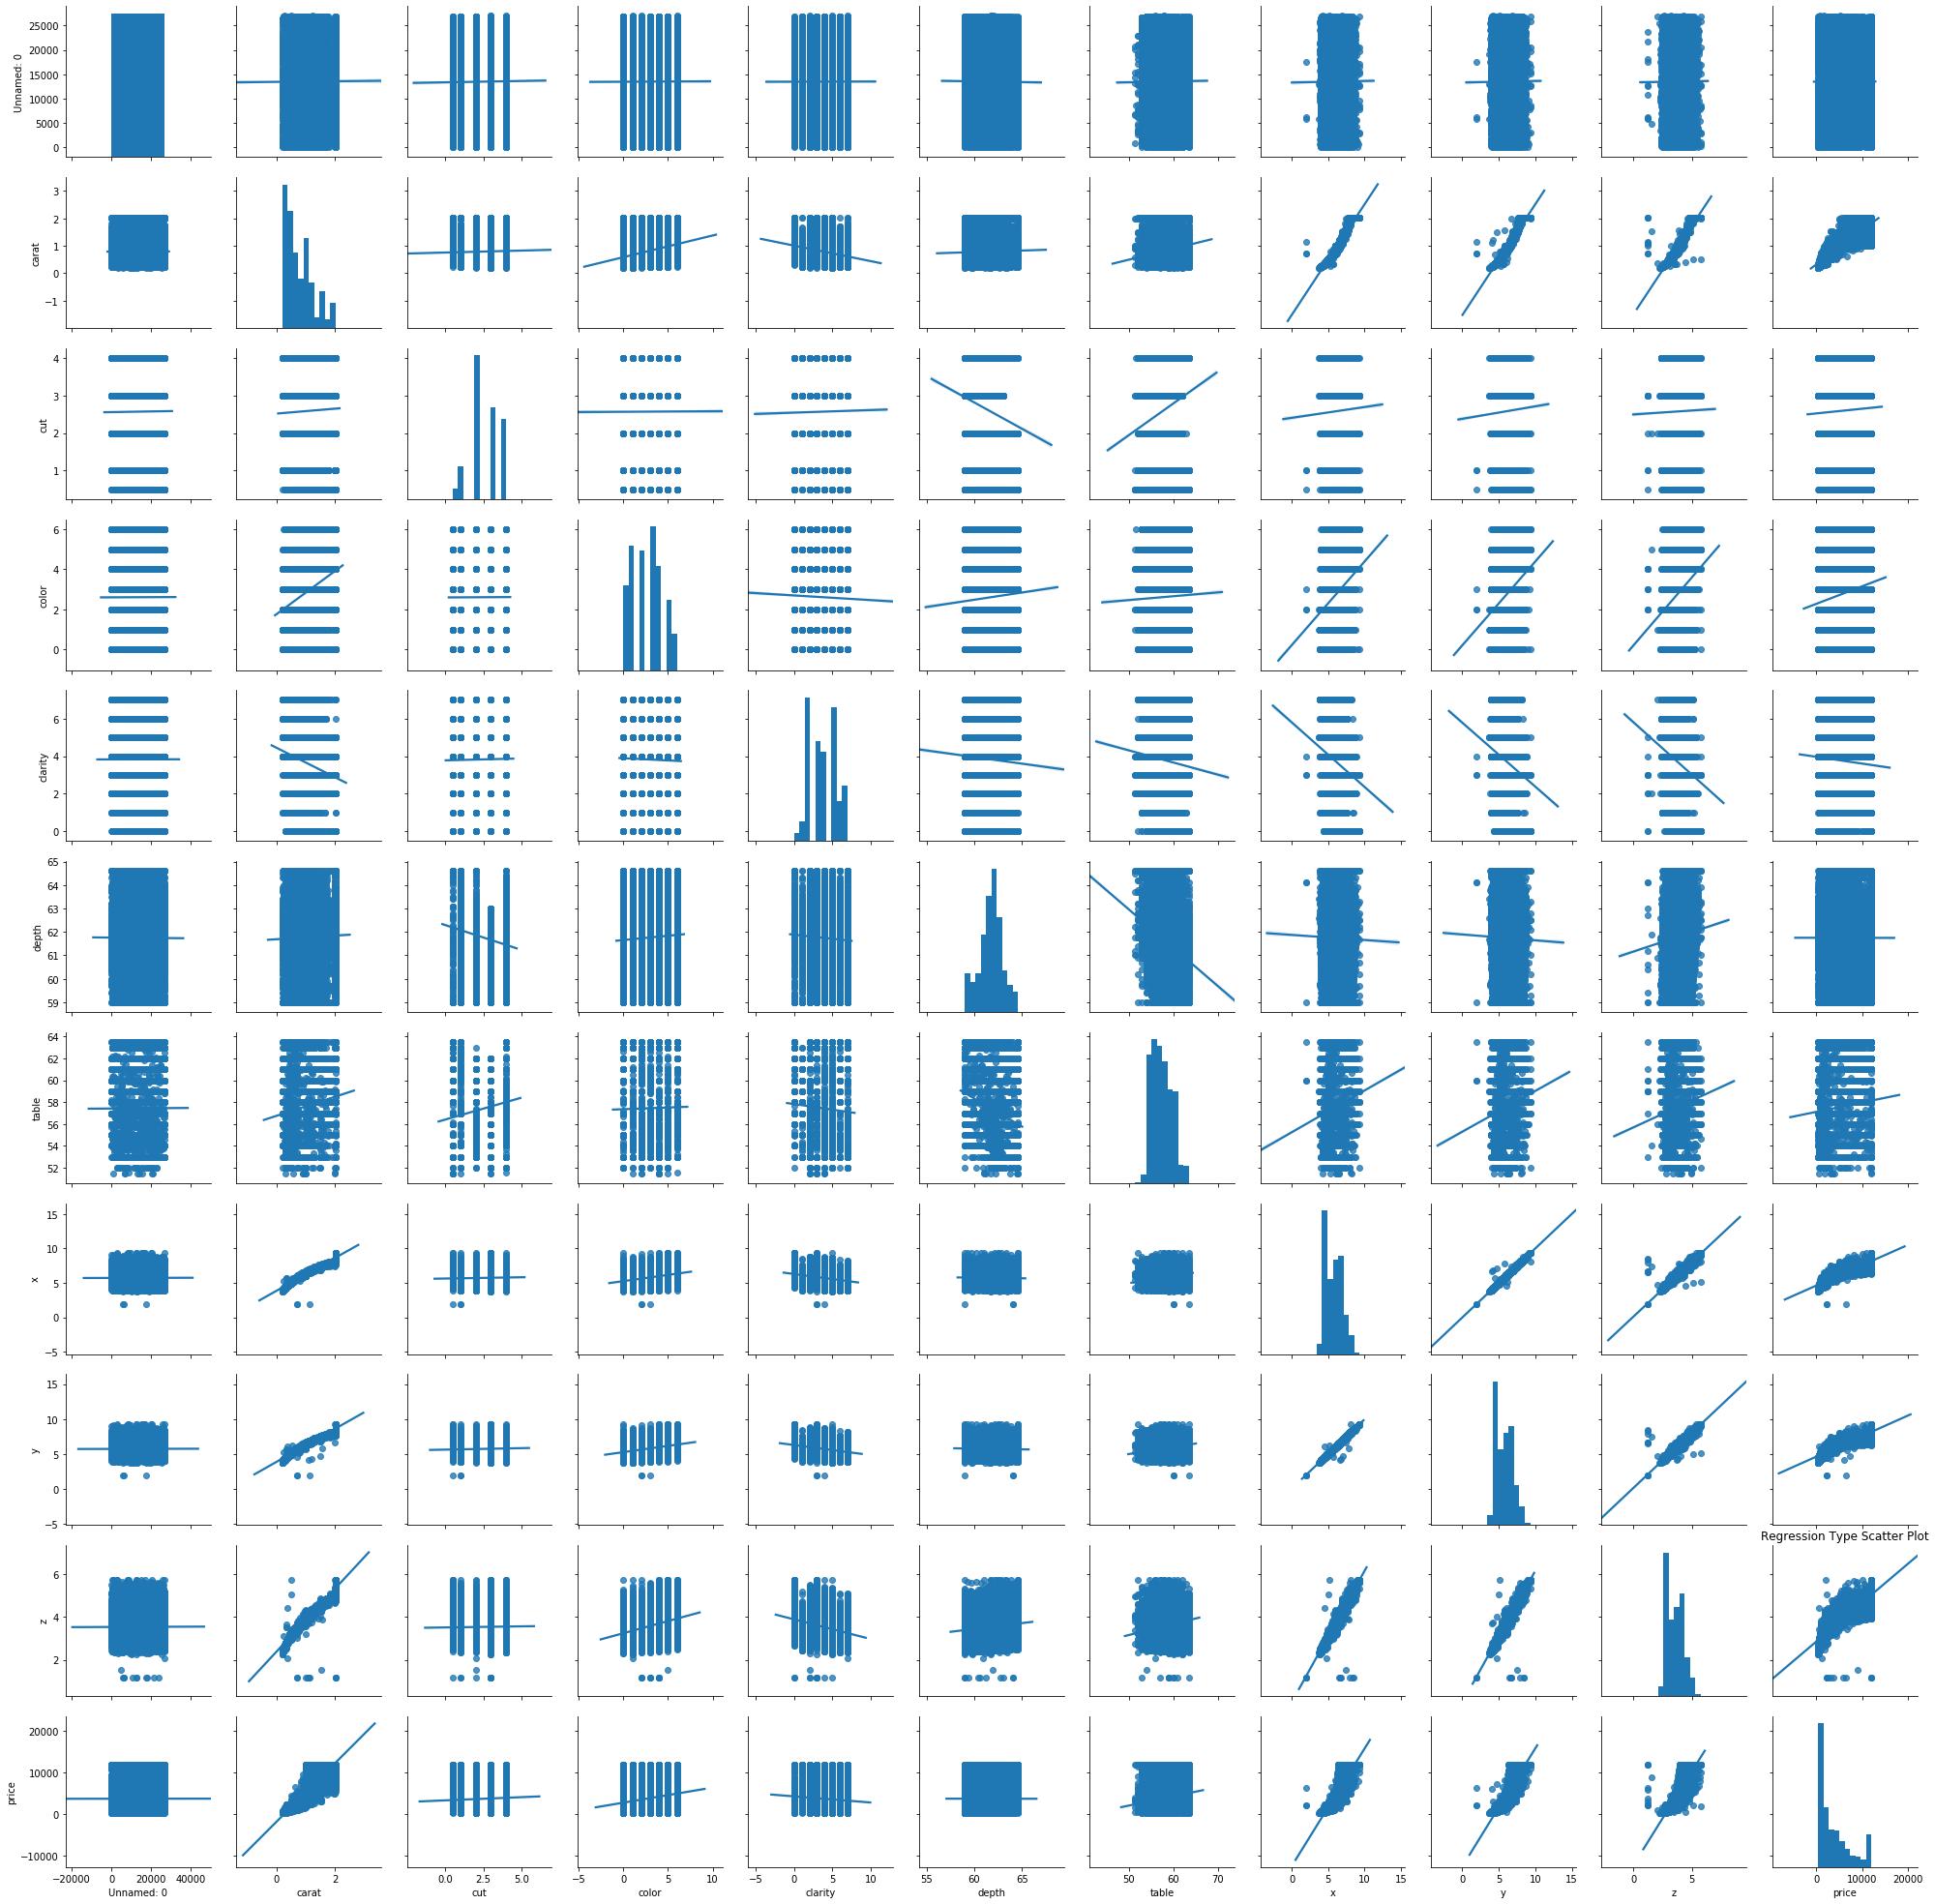

In [35]:
sns.pairplot(df, kind='reg')
plt.title('Regression Type Scatter Plot')
plt.savefig('q1_(regression kind)pair plot.png')

# 6.TRAIN TEST SPLIT

In [36]:
 df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

In [37]:
df = df.drop('a', axis = 1)

In [38]:
X = df.drop('price', axis = 1)

y = df[['price']]

In [39]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,1.0,60.8,58.0,4.42,4.46,2.70
2,0.90,4.0,1.0,7.0,62.2,60.0,6.04,6.12,3.78
3,0.42,2.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,2.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state  = 1)

# 7.Linear Regression Model

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9179.770941716366
The coefficient for cut is 35.016659638680544
The coefficient for color is -227.78232631138513
The coefficient for clarity is 249.4230222679398
The coefficient for depth is -93.28168568503094
The coefficient for table is -75.08555478355487
The coefficient for x is -2129.5083711932093
The coefficient for y is 1626.3629461676016
The coefficient for z is -261.3095464311368


In [43]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9889.094474729785


In [44]:
# R square on training data
score = regression_model.score(X_train, y_train)
print("The R square for training data is {}".format(score))

The R square for training data is 0.9103119017894044


In [45]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
Train_RMSE = np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("The RMSE for training data is {}".format(Train_RMSE))

The RMSE for training data is 1041.6969633311749


In [46]:
# R square on testing data
score = regression_model.score(X_test, y_test)
print("The R square for testing data is {}".format(score))

The R square for testing data is 0.9075236531515751


In [47]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
Test_RMSE = np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The RMSE for training data is {}".format(Test_RMSE))

The RMSE for training data is 1050.1062997718977


# 8.Regression Model using StatsModel

In [48]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,0.41,2.0,5.0,7.0,62.3,56.0,4.77,4.73,2.96,1061.0
9728,1.71,2.0,6.0,2.0,62.8,57.0,7.58,7.55,4.75,6320.0
1936,0.33,1.0,2.0,2.0,61.8,62.0,4.40,4.45,2.74,536.0
26220,0.70,4.0,4.0,2.0,62.8,57.0,5.61,5.66,3.54,2214.0
18445,0.70,2.0,0.0,3.0,62.1,56.0,5.67,5.71,3.53,2575.0


In [49]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [50]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y  + z'

In [53]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    9889.094475
carat        9179.770942
cut            35.016660
color        -227.782326
clarity       249.423022
depth         -93.281686
table         -75.085555
x           -2129.508371
y            1626.362946
z            -261.309546
dtype: float64

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:36:53   Log-Likelihood:            -1.5795e+05
No. Observations:               18876   AIC:                         3.159e+05
Df Residuals:                   18866   BIC:                         3.160e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9889.0945    703.594     14.055      0.0

In [54]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse)

1041.696963331177

In [55]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

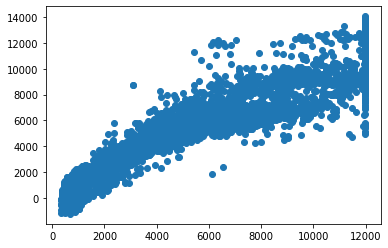

In [56]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [57]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(9889.09) * Intercept + (9179.77) * carat + (35.02) * cut + (-227.78) * color + (249.42) * clarity + (-93.28) * depth + (-75.09) * table + (-2129.51) * x + (1626.36) * y + (-261.31) * z + 

The final Linear Regression equation is

**price = (3.43) * (9889) * Intercept + (9179) * carat_weight + (35.02) * cut_quality + (-227.78) * color + (249.42) * clarity + (-93.28) * depth + (-0.75.09) * table + (-2129.51) * lenght + (-1626.36) * width + (-261.31) * height**

# Problem 2

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# 9.EDA

In [59]:
data1 =pd.read_csv("Holiday_Package.csv")

In [60]:
data1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [113]:
data1.shape

(872, 7)

In [62]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [114]:
data1.describe()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes,Prediction
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,45608.336869,39.955275,9.307339,0.311927,0.982798,0.247706,0.375000
std,15699.745151,10.551675,3.036259,0.612870,1.086786,0.431928,0.484401
min,8105.750000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000,0.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000,1.000000
max,80687.750000,62.000000,21.000000,3.000000,6.000000,1.000000,1.000000


In [64]:
data1.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [65]:
data1.duplicated().sum()

0

# 10. Encoding Data

In [66]:
labelencoder = LabelEncoder()

In [67]:
data1['Holliday_Package'] = labelencoder.fit_transform(data1['Holliday_Package'])

In [68]:
data1 = pd.get_dummies(data1, columns=['foreign'],drop_first=True)

In [69]:
data1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,1,0,48412,30,8,1,1,0
1,2,1,37207,45,8,0,1,0
2,3,0,58022,46,9,0,0,0
3,4,0,66503,31,11,2,0,0
4,5,0,66734,44,12,0,2,0


In [70]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null int32
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign_yes          872 non-null uint8
dtypes: int32(1), int64(6), uint8(1)
memory usage: 45.3 KB


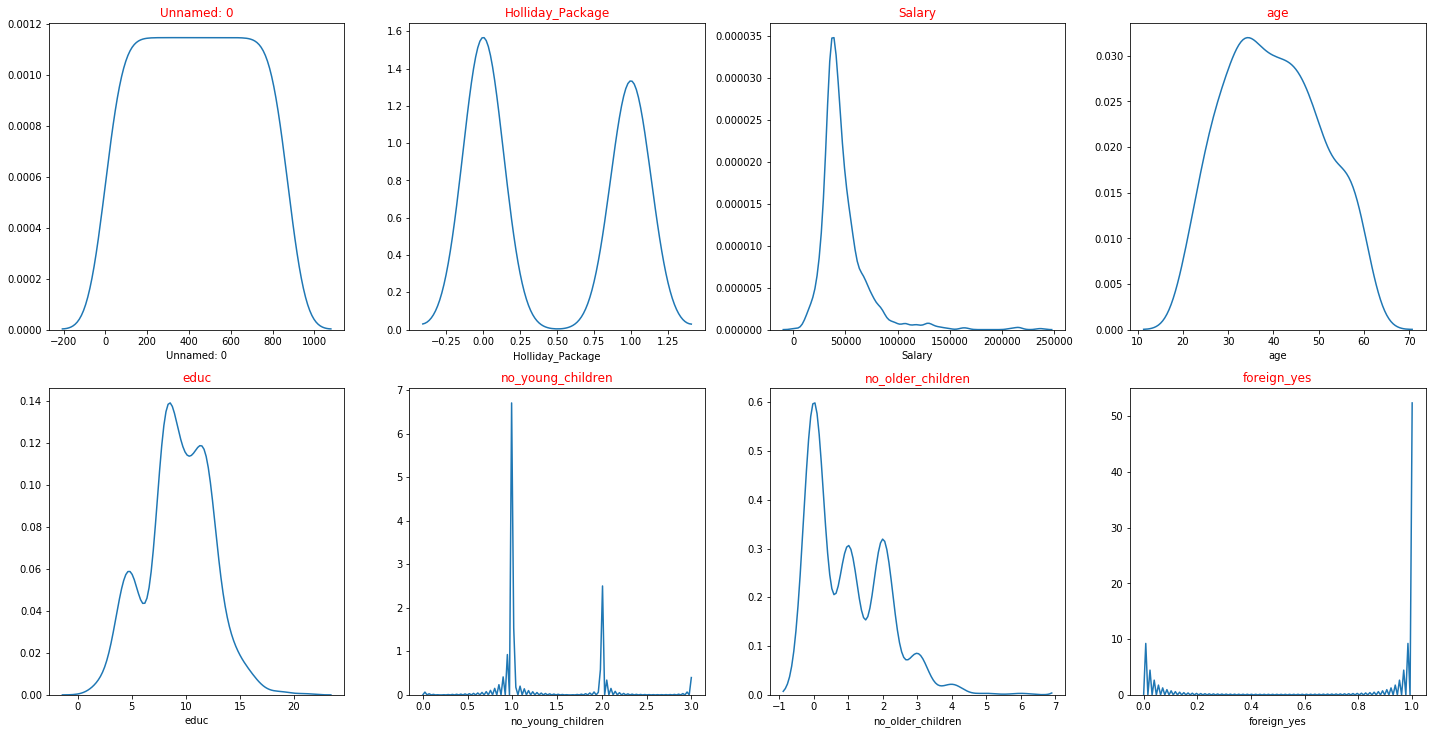

In [71]:
dist_plot=data1
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],hist=False)
    ax.set_title(dist_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q2_displots for all the variables')
plt.show()

# 11.Outliers

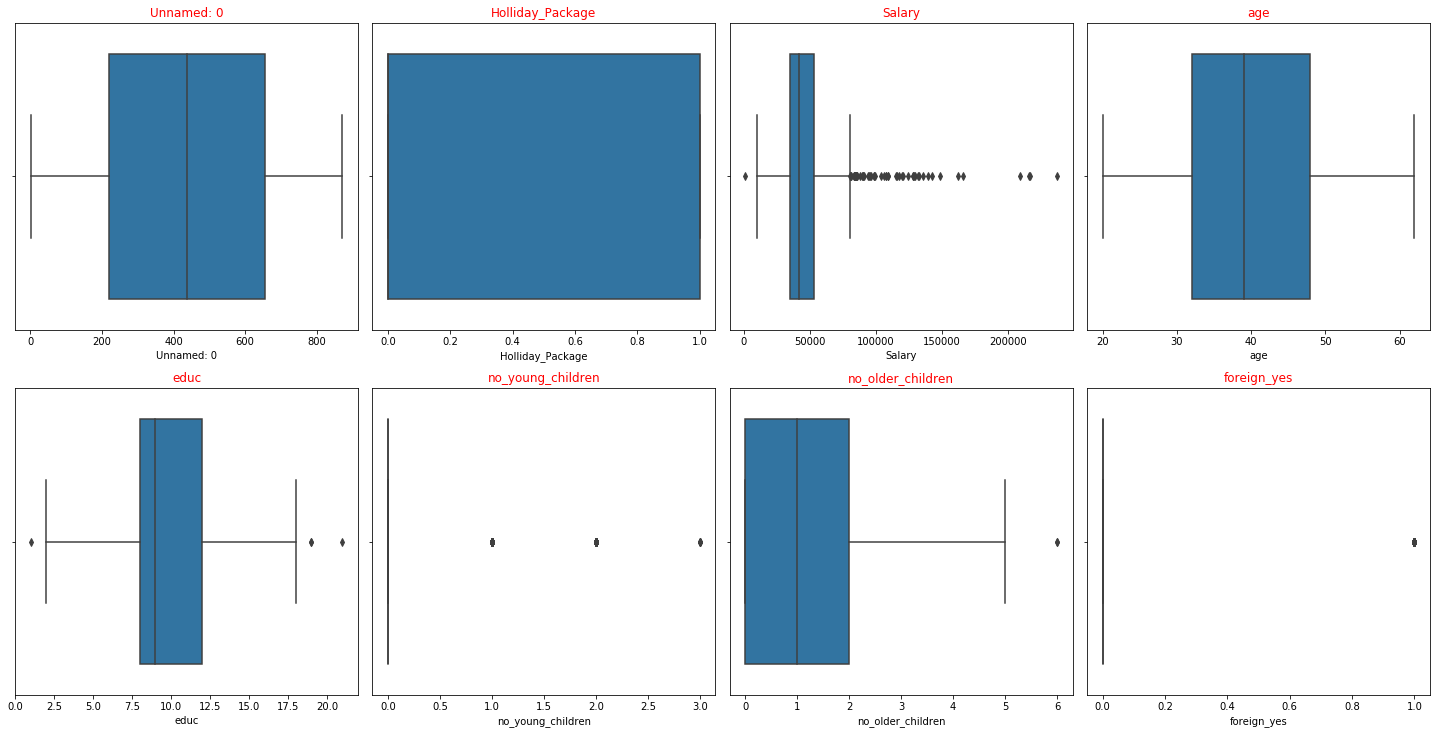

In [72]:
box_plot=data1
fig=plt.figure(figsize=(20,20))
for i in range(0,len(box_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(box_plot[box_plot.columns[i]])
    ax.set_title(box_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

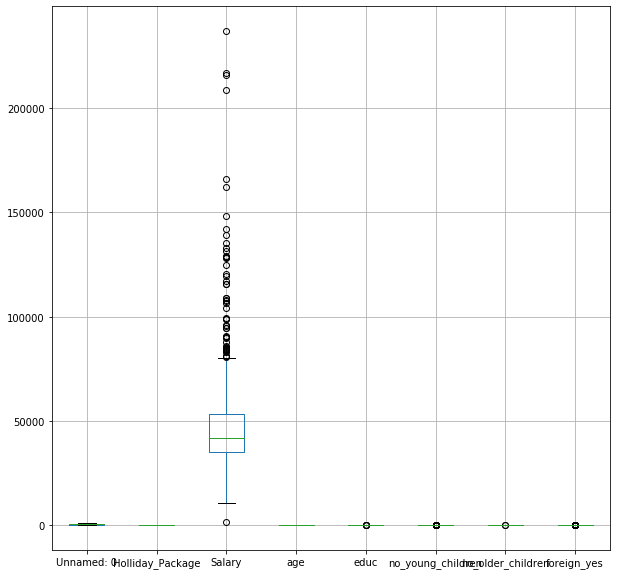

In [73]:
plt.figure(figsize=(10,10))
data1.boxplot()
plt.savefig('boxplot_with_outliers.png')

In [74]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [75]:
    lr,ur=remove_outlier(data1['Salary'])
    data1['Salary']=np.where(data1['Salary']>ur,ur,data1['Salary'])
    data1['Salary']=np.where(data1['Salary']<lr,lr,data1['Salary'])

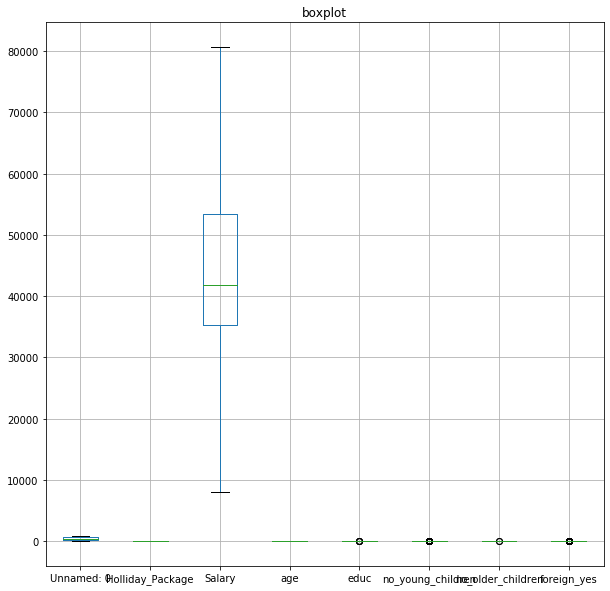

In [76]:
plt.figure(figsize=(10,10))
plt.title('boxplot')
data1.boxplot()
plt.savefig('q2_boxplot.png')

# 12.Pair-plots and heatmaps

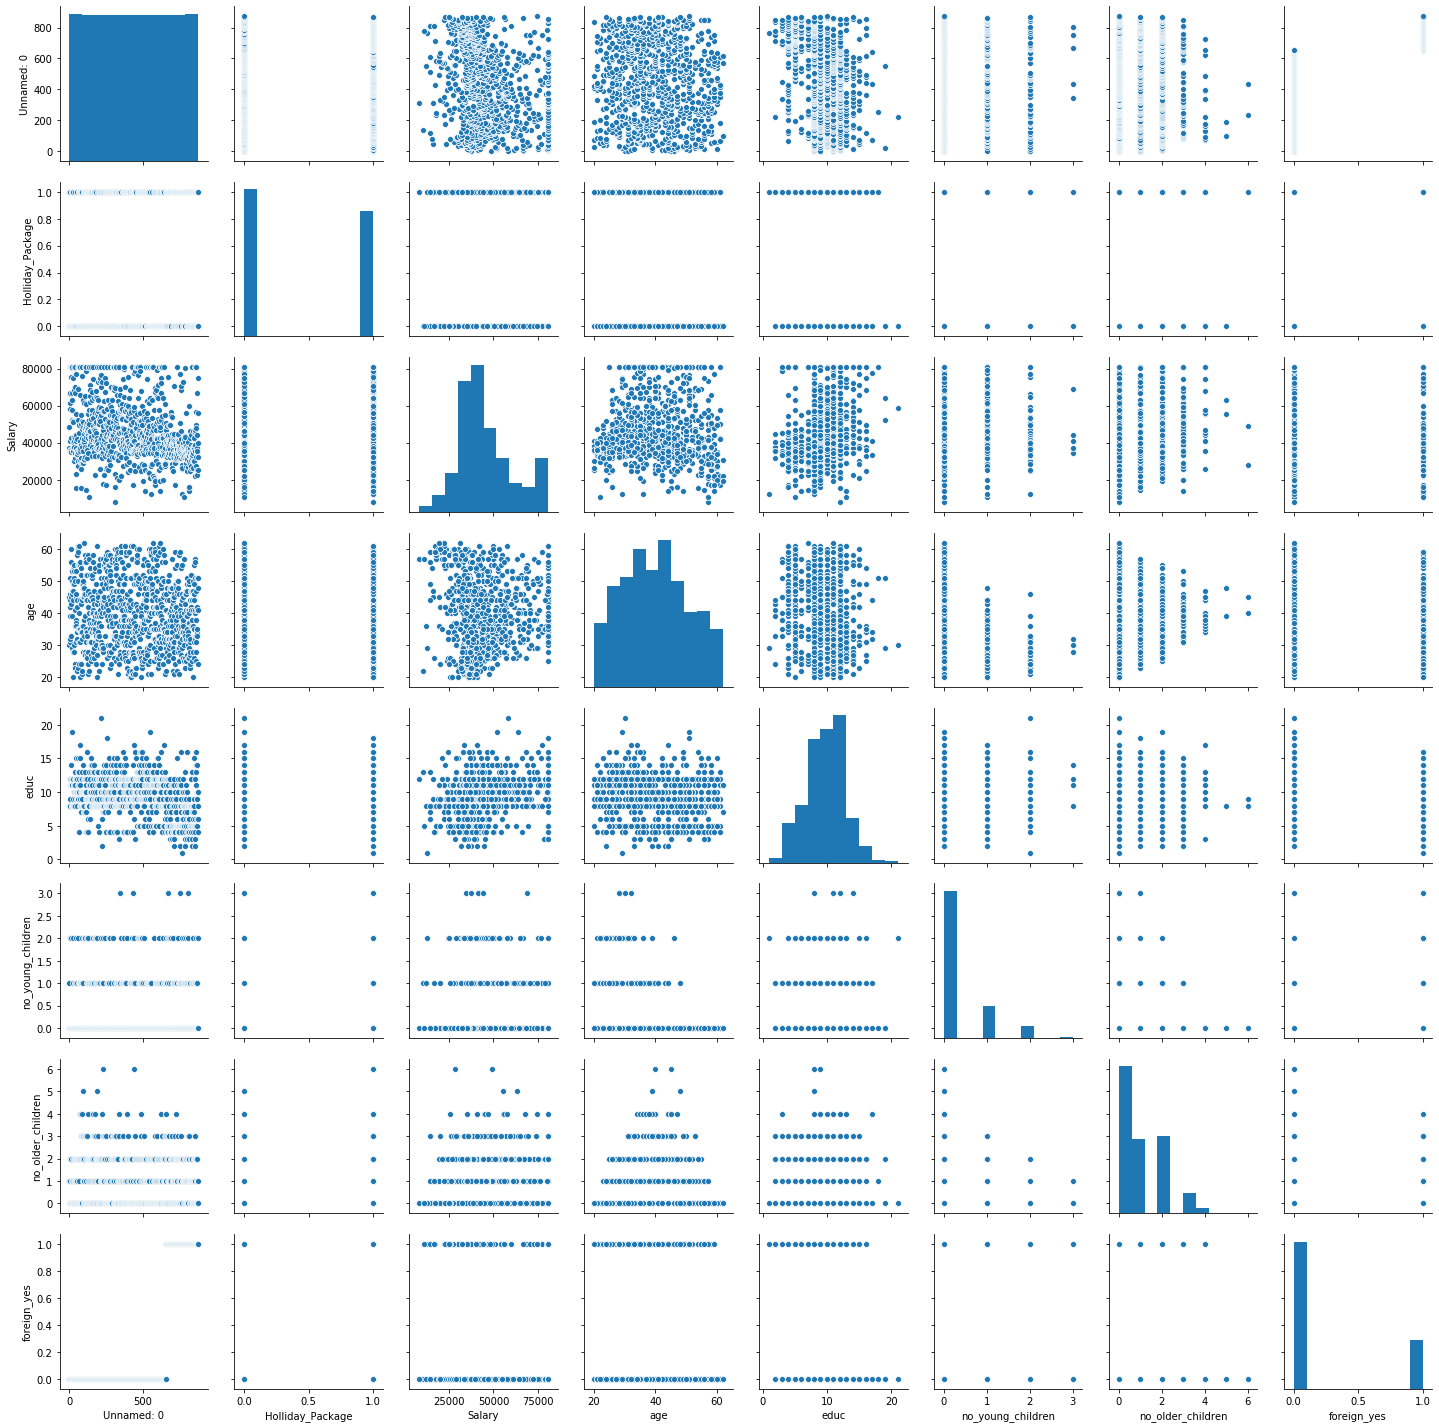

In [77]:
sns.pairplot(data1, kind = 'scatter')
plt.savefig('q2_pair_plot_kde.png')

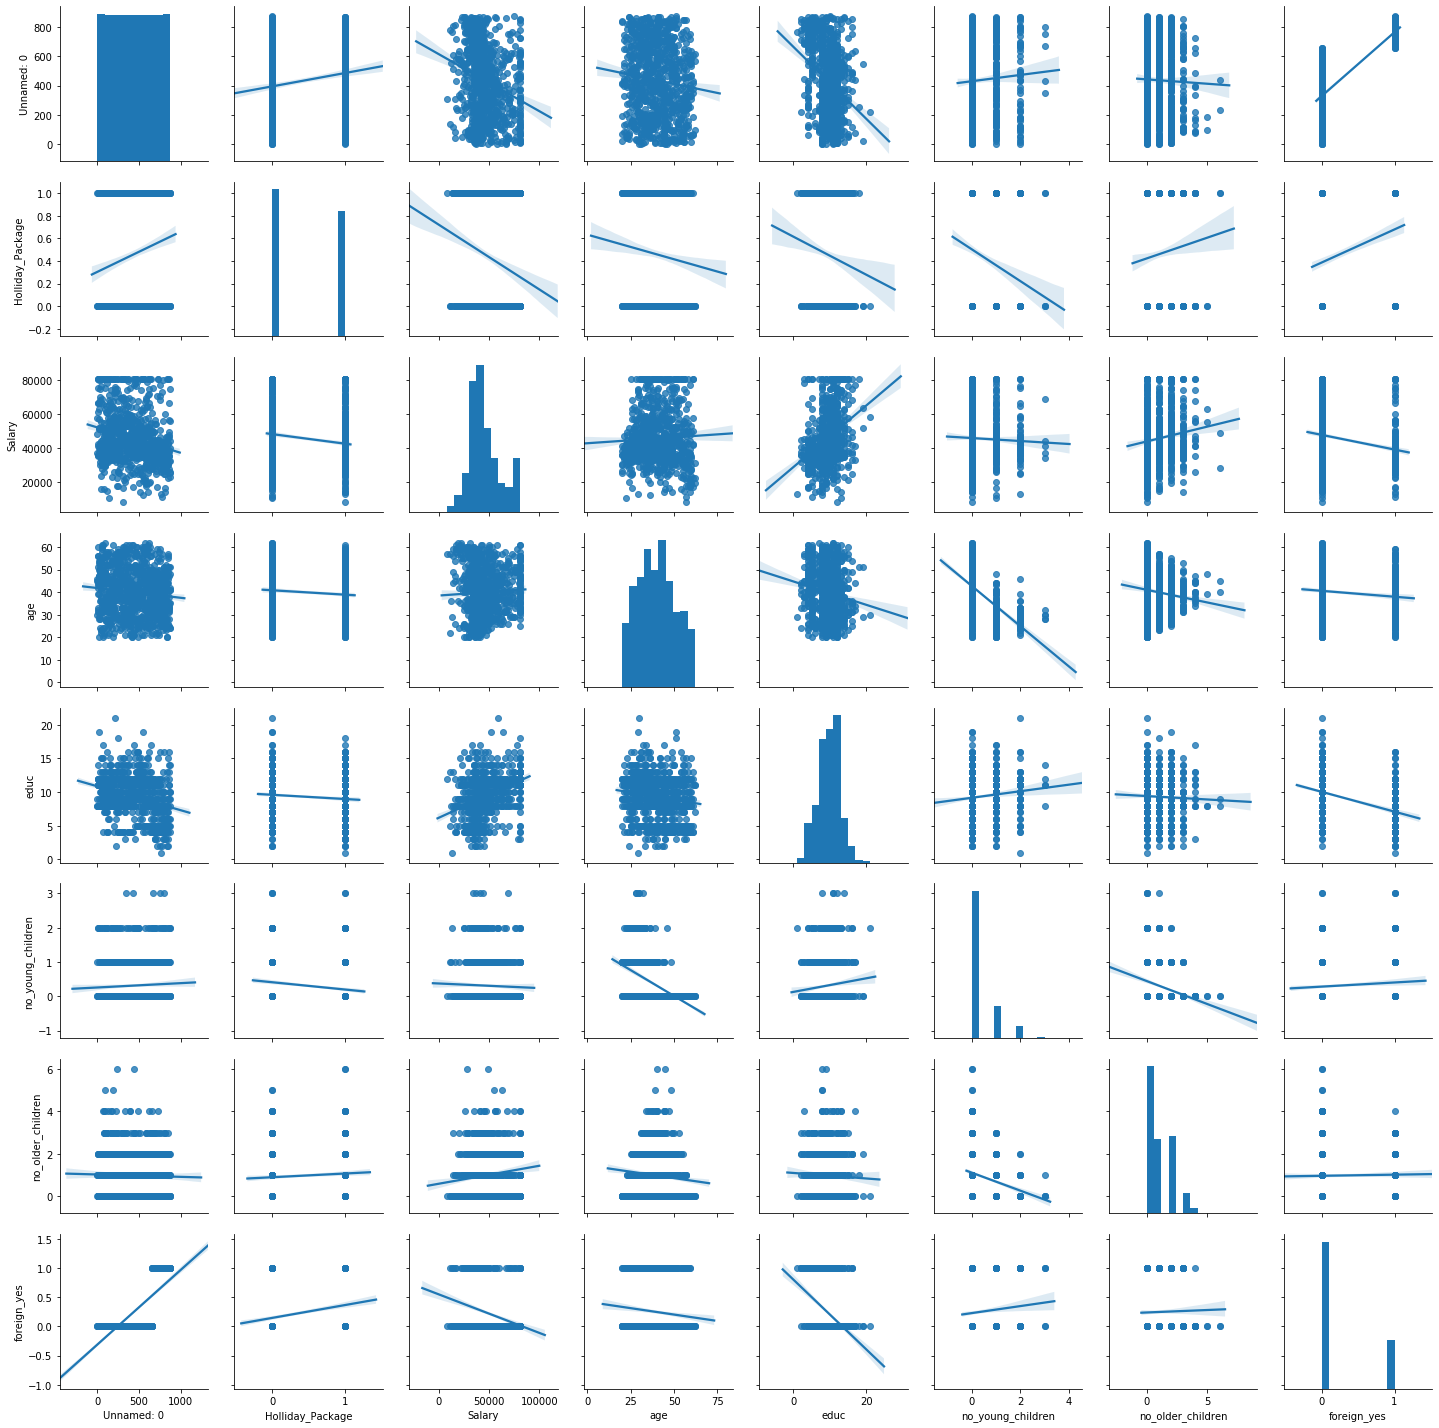

In [78]:
sns.pairplot(data1, kind = 'reg')
plt.savefig('q2_pair_plot_regression.png')

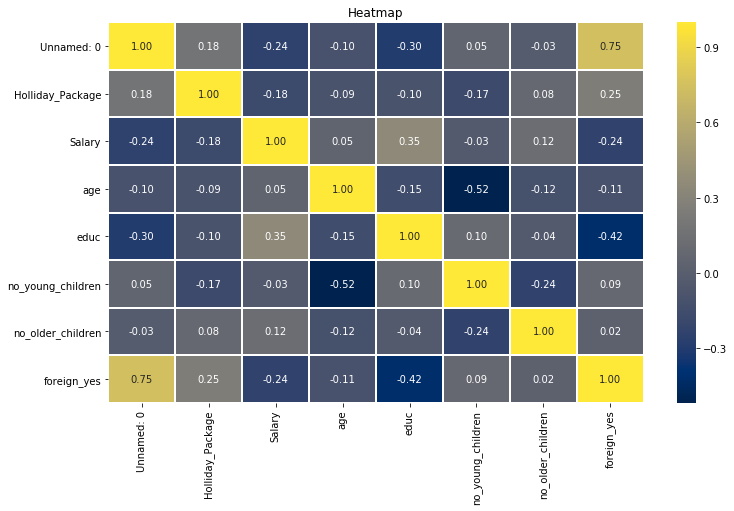

In [79]:
plt.figure(figsize=(12,7))
sns.heatmap(data1.corr(),annot=True,fmt='.2f', cmap='cividis',  linewidths=1)
plt.title('Heatmap')
plt.savefig('q2_heatmap.png')

In [115]:
data1.cov()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes,Prediction
Salary,2.464820e+08,7790.779722,16813.912134,-330.606921,2081.479395,-1623.321485,-2708.526873
age,7.790780e+03,111.337837,-4.783024,-3.356871,-1.332573,-0.488335,-1.389638
educ,1.681391e+04,-4.783024,9.218867,0.183012,-0.119851,-0.550385,-0.297933
no_young_children,-3.306069e+02,-3.356871,0.183012,0.375610,-0.158807,0.022530,-0.071183
no_older_children,2.081479e+03,-1.332573,-0.119851,-0.158807,1.181104,0.010006,0.079937
foreign_yes,-1.623321e+03,-0.488335,-0.550385,0.022530,0.010006,0.186562,0.122847
Prediction,-2.708527e+03,-1.389638,-0.297933,-0.071183,0.079937,0.122847,0.234644


In [116]:
data1.corr()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes,Prediction
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387,-0.356152
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148,-0.271879
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678,-0.202570
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111,-0.239773
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317,0.151844
foreign_yes,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000,0.587150
Prediction,-0.356152,-0.271879,-0.202570,-0.239773,0.151844,0.587150,1.000000


In [80]:
data1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data1 = data1.drop('a', axis = 1)

In [81]:
data1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


# 13.train test split

In [82]:
X = data1.drop("Holliday_Package" , axis=1)

y = data1.pop("Holliday_Package")

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# 14.Logistic Regression

In [117]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2, random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none', random_state=1,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [118]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [119]:
model.coef_

array([[-1.91705155e-05, -5.62658839e-02,  7.34162668e-02,
        -1.56373932e+00, -6.07025038e-02,  1.57821319e+00]])

In [120]:
model.intercept_

array([2.44196609])

In [121]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Salary is -1.9170515479269605e-05
The coefficient for age is -0.05626588394458238
The coefficient for educ is 0.07341626678031271
The coefficient for no_young_children is -1.5637393212369362
The coefficient for no_older_children is -0.060702503824225144
The coefficient for foreign_yes is 1.5782131907436499


# 15.training data result for Logistic Regression

In [122]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6754098360655738

AUC: 0.742


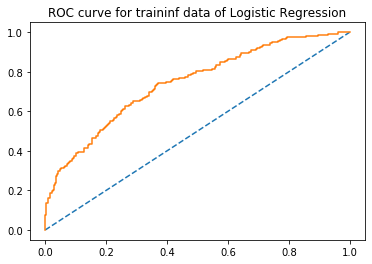

In [137]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for traininf data of Logistic Regression')
plt.plot(train_fpr, train_tpr)

In [124]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [124, 160]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for training data of Logistic Regression model')

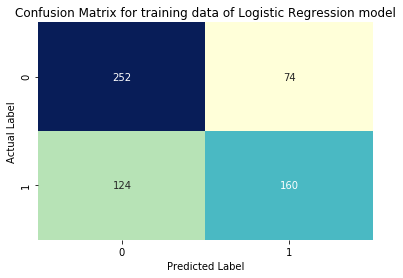

In [134]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Logistic Regression model')

In [140]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



# 16.testing data result for Logistic Regression

In [127]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.742


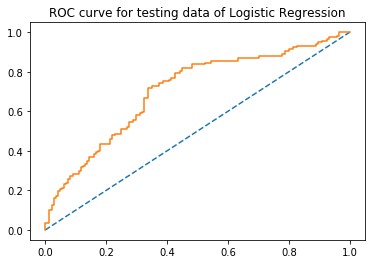

In [138]:
# predict probabilities
probs2 = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Logistic Regression')
plt.plot(test_fpr, test_tpr)

In [129]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[102,  43],
       [ 52,  65]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for testing data of Logistic Regression model')

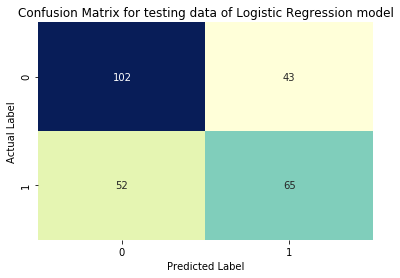

In [133]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Logistic Regression model')

In [130]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.6374045801526718

In [131]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



# 17.LDA Model

In [99]:
clf = LinearDiscriminantAnalysis()
model2 = clf.fit(X,y)
model2

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [100]:
pred_class = model2.predict(X)
data1['Prediction'] = pred_class 
data1.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes,Prediction
0,48412.0,30,8,1,1,0,0
1,37207.0,45,8,0,1,0,0
2,58022.0,46,9,0,0,0,0
3,66503.0,31,11,2,0,0,0
4,66734.0,44,12,0,2,0,0


In [101]:
ytrain_predict2 = model.predict(X_train)
ytest_predict2 = model.predict(X_test)

# 18.training data results for LDA model

In [102]:
# Accuracy - Training Data
model2.score(X_train, y_train)

0.6737704918032786

AUC: 0.735


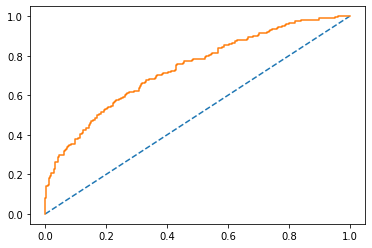

In [103]:
# predict probabilities
probs3 = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs3)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [104]:
confusion_matrix(y_train, ytrain_predict2)

array([[252,  74],
       [124, 160]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for training data of LDA model')

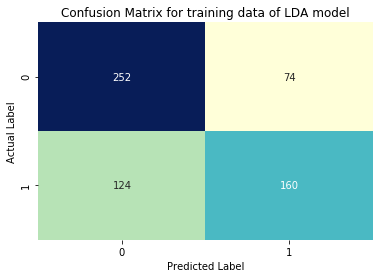

In [135]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of LDA model')

In [105]:
print(classification_report(y_train, ytrain_predict2))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



# 19. testing data result for LDA

In [106]:
# Accuracy - Test Data
model2.score(X_test, y_test)

0.6603053435114504

AUC: 0.735


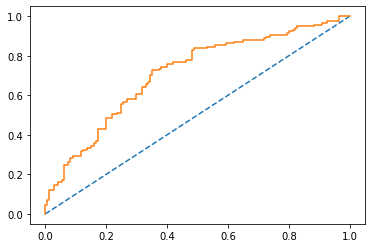

In [107]:
# predict probabilities
probs4 = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs4)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [108]:
cnf_matrix=confusion_matrix(y_test, ytest_predict2)
cnf_matrix

array([[102,  43],
       [ 52,  65]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix for testing data of LDA model')

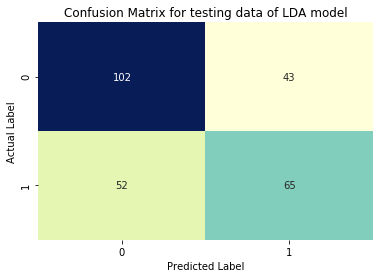

In [136]:
sns.heatmap(confusion_matrix(y_test, ytest_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of LDA model')

In [109]:
#Test Data Accuracy
test_acc=model2.score(X_test,y_test)
test_acc

0.6603053435114504

In [110]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262

